In [77]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset

category=12

def load_data():
    x=[]
    y=[]
    x_test=[]
    y_test=[]
    
    for i in range(category):
        root = f'../train/{i+1}'
        filenames = os.listdir(root)
        # we shuffle the data point to make the model more robust
        np.random.shuffle(filenames)  
        test_num = 0
        for filename in filenames:
            img_root = os.path.join(root, filename)
            image = Image.open(img_root)
            if test_num < (int)(0.2*len(filenames)):
                x_test.append(np.expand_dims(np.array(image),axis=0))
                y_test.append([1 if j == i else 0 for j in range(12)])
                test_num += 1
            else:
                x.append(np.expand_dims(np.array(image),axis=0))
                y.append([1 if j == i else 0 for j in range(12)])
    
    x = np.array(x)
    y = np.array(y)
    x_test = np.array(x_test)
    y_test = np.array(y_test)
    
    return x, y, x_test, y_test

class MyDataset(Dataset):
    def __init__(self, data_type='train', transform=None):
        x, y, x_test, y_test = load_data()
        if data_type == 'train':
            self.x, self.y = x.astype(float), y.astype(float)
        else:
            self.x, self.y = x_test.astype(float), y_test.astype(float)
        self.transform = transform
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        sample_x, sample_y = self.x[idx], self.y[idx]
        # 转换 NumPy 数组为 PIL 图像
        
        # 如果定义了 transform，则应用 transform
        if self.transform:
            sample_x = self.transform(Image.fromarray(sample_x[0]))
            sample_x = np.array(sample_x)
        
        return sample_x, sample_y




In [78]:
# 定义数据增强的转换
data_transforms = transforms.Compose([
    transforms.RandomRotation(degrees=30),  # 在 -30 到 +30 度之间随机旋转
    transforms.ToTensor(),  # 转换为张量
])

# 创建 MyDataset 实例，并传递 transform 参数
dataset = MyDataset(data_type='train',transform=data_transforms)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [81]:
for x,y in train_loader:
    print(x.shape)
    print(y.shape)
    break

torch.Size([32, 1, 28, 28])
torch.Size([32, 12])


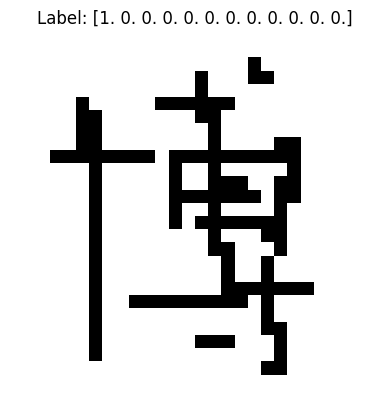

In [80]:
from PIL import Image
import matplotlib.pyplot as plt

# 从数据集中获取一张图片
sample_x, sample_y = dataset[0]  # 获取第一张图片

# 将 PyTorch 张量转换为 PIL 图像
pil_image = transforms.ToPILImage()(sample_x.squeeze(0))  # 移除第一个维度

# 显示图像
plt.imshow(pil_image, cmap='gray')  # 使用灰度色彩映射
plt.title(f"Label: {sample_y}")
plt.axis('off')
plt.show()
